In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("global_cancer_patients_2015_2024 (1).csv")

In [11]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [7]:
data.duplicated().sum()

np.int64(0)

# Descriptive analysis


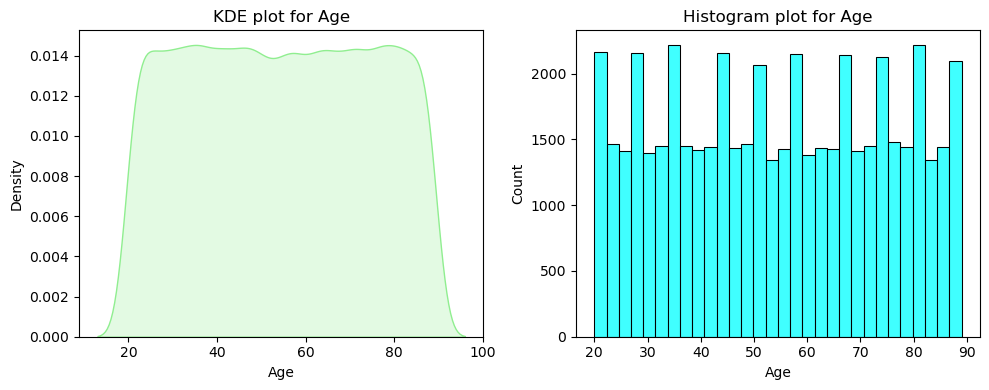

In [8]:
#plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"],fill=True,color="lightgreen")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"],bins=30,kde=False,color="cyan")
plt.title("Histogram plot for Age")

plt.tight_layout()
plt.show()           
           

In [9]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [ ]:
# Inference

Range:20 to 89 years
Mean Age:54.42 years
Standard Deviation:20.22
Interquartile Range(IQR):37(Q1)to72(Q3)
This suggest a broad representation of both young and elderly patients in the dataset,which support age-based comparative analysis.

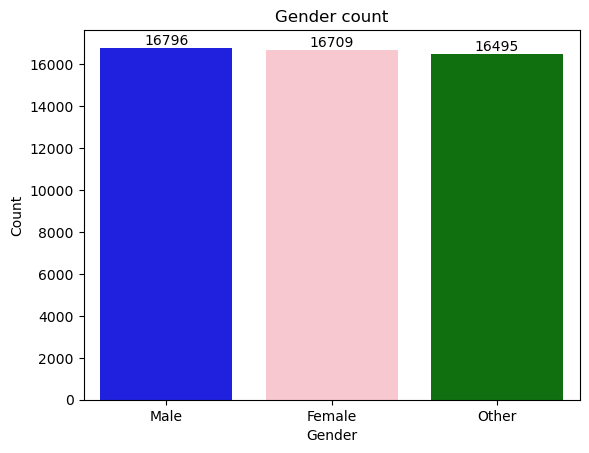

In [4]:
# Gender column
data["Gender"].value_counts()

sns.barplot(x= data["Gender"].value_counts().index,
            y= data["Gender"].value_counts().values,
            palette=["blue", "pink", "green"]
           )
for i , v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [5]:
data["Gender"].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

The dataset contains three gender categories(Male, Female ,other) with the most common being Male (16,796 records).
Gender distribution is sufficient for evaluating gender-specific survival trends and severity outcomes.

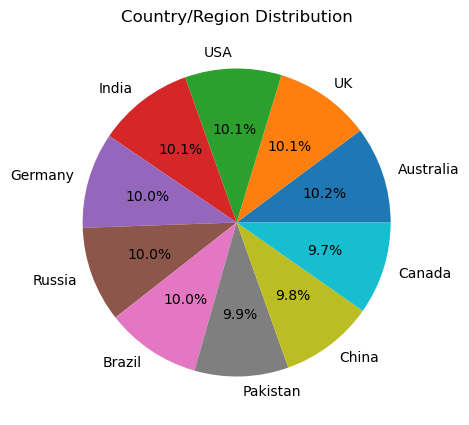

In [7]:
# countries column

country_counts= data["Country_Region"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values, 
        labels=country_counts.index,
        autopct= '%1.1f%%'
       )

plt.title("Country/Region Distribution")
plt.show()

Patients come from 10 different countries/regions, with Australia being the most represented (5,092 patients). Number of data points for each country is almost same.
This diversity enables cross-country comparison of cancer outcomes and treatment economic.

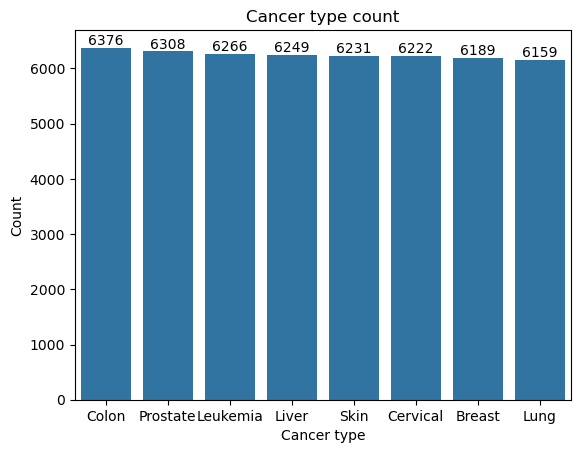

In [12]:
# cancer type 
data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values)

for i , v  in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

We have in  total 8 types of cancer , with each cancer having approx same number of data points under the label , most common cnacers are colon cancer followed by Prostate cancer


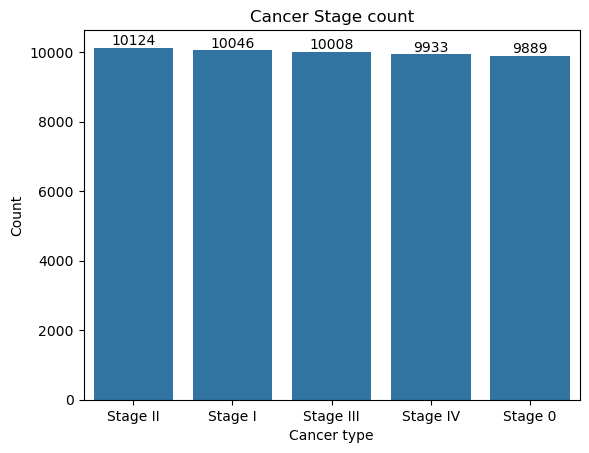

In [9]:
# Cancer Stage
data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values)

for i , v  in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer Stage count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

Cancer Stage have 5 stages with values ranging from 0 to 4 , with stage 2 the most common one , and each stage have  almost same number of data pointsn under its label.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

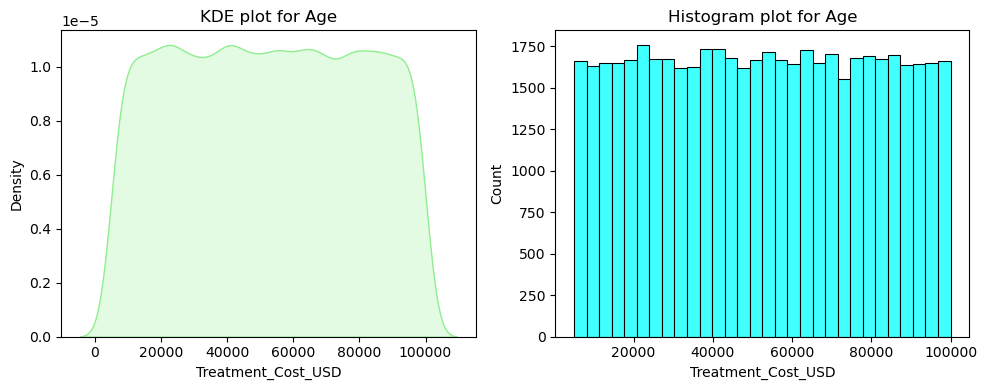

In [4]:
# plotting for treatment cost

# plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color="lightgreen")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30,  kde=False, color="cyan")
plt.title("Histogram plot for Age")

plt.tight_layout()
plt.show()

In [5]:
data["Treatment_Cost_USD"].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

Treatment cost USD have no skewness , and there are almost same number of data points under each bin as observed by histogram

In [10]:
# ANALYLIZING THE RISK FACTORS
column_of_interest= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary= data[column_of_interest].agg(['mean', "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


These variables have nearly identical means and standard deviations, indicating they were likely designed on the same standardized scale. They are essential in studying interaction effects (e.g., genetic risk × smoking) on survival.

# Determine the relationship between risk factors and cancer sevirity

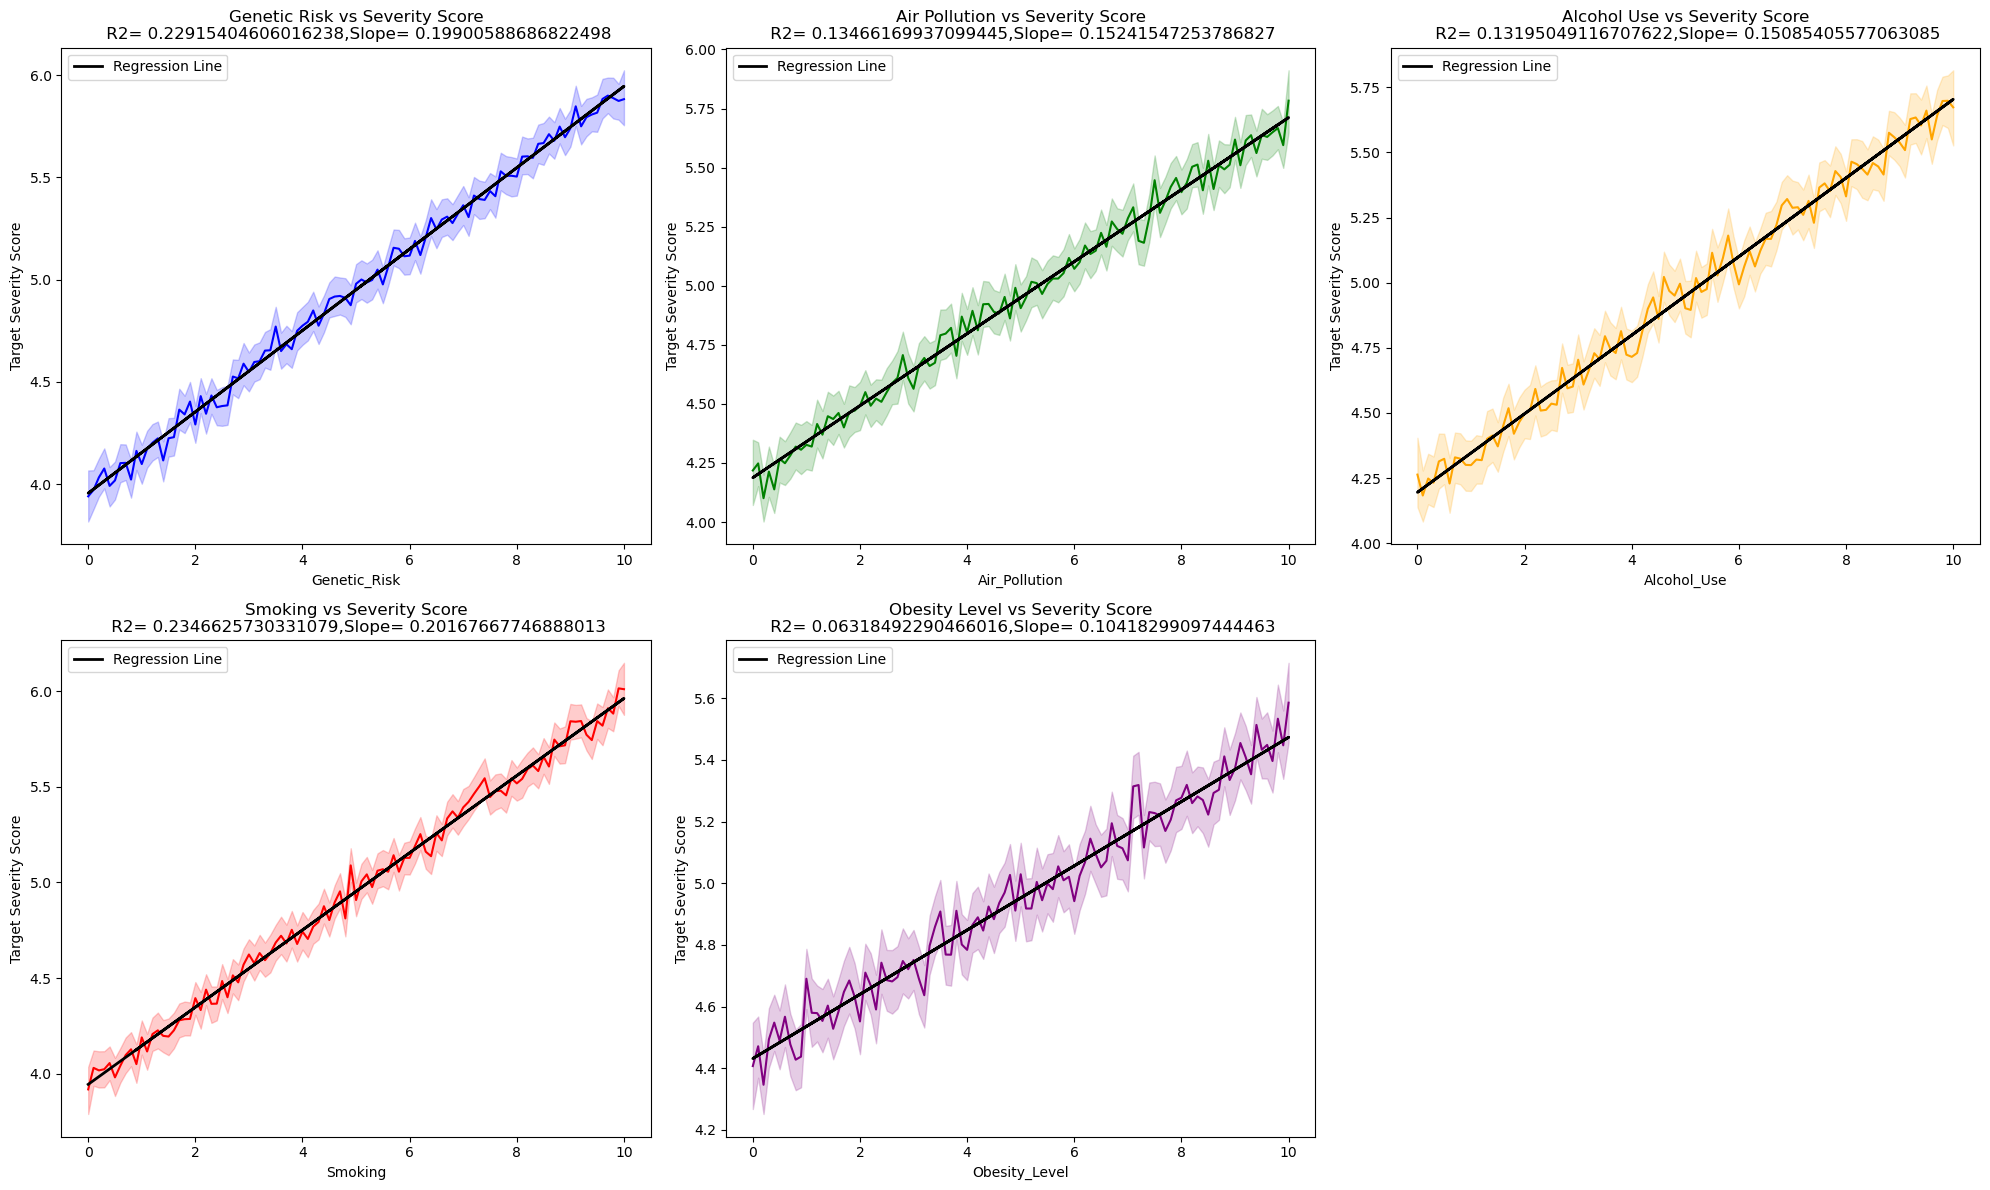

In [9]:
from scipy.stats import linregress

risk_factors= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles= ['Genetic Risk','Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors= ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20,12))
for i , (factor , title,color) in enumerate(zip(risk_factors, titles, colors),1):
    plt.subplot(2,3,i)
    
    x=data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept , r_value , p_value , std_err= linregress(x,y)
    r_squared= r_value**2

    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black", linewidth=2, label="Regression Line")
    plt.title(f"{title} vs Severity Score\n R2= {r_squared},Slope= {slope}")
    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    plt.legend()

#line= y=mx+c

plt.tight_layout()
plt.show()
    
    

To understand the contribution of various risk factors to cancer severity, line plots were generated for five primary variables: Genetic Risk, Air Pollution, Alcohol Use, Smoking, and Obesity Level, plotted against the Target Severity Score.
All graphs reveal a positive relationship, indicating that as the level of a particular risk factor increases, the corresponding severity of the condition also tends to rise. However, the degree of association—measured by the slope and tightness of the confidence interval—varies across factors.

Genetic Risk vs Target Severity Score
R² = 0.23:
A weak linear relationship. Only 23% of the variability in Target_Severity_Score can be explained by Genetic_Risk. This suggests that other factors likely play a larger role in influencing the severity score.
Slope = 0.20:
A positive slope indicates that as Genetic_Risk increases, the Target_Severity_Score also tends to increase. For each unit increase in Genetic_Risk, the target severity score increases by 0.20 units. However, because the R² is relatively low.

Air Pollution vs Target Severity Score
R² = 0.13:
A very weak relationship. Only 13% of the variance in Target_Severity_Score can be explained by Air_Pollution, meaning that this factor has a limited effect on the target variable.
Slope = 0.15:
A positive slope means that as air pollution increases, the severity score slightly increases. But, due to the low R², this relationship is weak and unreliable as a predictor for the target severity.

Alcohol Use vs Target Severity Score
R² = 0.13:
Similarly, the relationship between Alcohol_Use and Target_Severity_Score is also weak. Only 13% of the variation in the target score is explained by alcohol use.
Slope = 0.15:
The positive slope indicates that increased alcohol use correlates with a slight increase in target severity. However, like air pollution, the weak R² suggests other factors have a much stronger influence on the target.

Smoking vs Target Severity Score
R² = 0.23:
A weak relationship, similar to Genetic_Risk. Smoking explains only 23% of the variance in the target score, leaving the majority of the variation to be explained by other factors.
Slope = 0.20:
The positive slope implies that as smoking increases, the target severity score increases as well. This relationship is similar to that of genetic risk, but with a weak linear association (low R²).

Obesity Level vs Target Severity Score
R² = 0.06:
The weakest relationship among all factors. Only 6% of the variation in the target score is explained by obesity level, suggesting that obesity has a minimal effect on the target variable.
Slope = 0.10:
A positive slope, indicating a slight increase in the severity score as obesity level increases. However, due to the very low R², this is a weak and unreliable relationship.


Key Takeaways:
Weak Linear Relationships:
The R² values for all risk factors are relatively low, ranging from 0.06 to 0.23. This indicates that while there is some relationship between these risk factors and the Target_Severity_Score, it is weak. These factors alone do not explain much of the variation in the target variable.

Positive Trends:
All the slope values are positive, suggesting that as each risk factor increases, the Target_Severity_Score tends to increase as well. However, because the R² values are low, this increase is not strongly consistent across all data points.

Other Influences:
The low R² values imply that other, unmeasured factors are likely contributing to the variation in Target_Severity_Score. The risk factors you examined are only weakly correlated with the target and are not reliable predictors on their own.

Next Steps:
Given the weak explanatory power of these individual factors, it might be useful to explore other variables or more complex models that could account for more of the variation in the Target_Severity_Score. This could include interactions between risk factors, adding new features, or applying more sophisticated regression techniques.

# Analyze the proportion of early-stage diagnoses by cancer type

In [11]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [12]:
stage_count= data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : 38.43156356551388


In [13]:
stage_count= data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : 39.53080114905841


In [14]:
stage_count= data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : 39.47325900791727


In [15]:
stage_count= data[data["Cancer_Type"]=="Colon"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41718946047679


In [16]:
stage_count= data[data["Cancer_Type"]=="Skin"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41084898090194


In [17]:
stage_count= data[data["Cancer_Type"]=="Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : 39.85856637737062


In [18]:
stage_count= data[data["Cancer_Type"]=="Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : 40.187064045656314


In [19]:
stage_count= data[data["Cancer_Type"]=="Liver"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : 40.614498319731155


The analysis demonstrates that early-stage diagnosis for various cancer types is relatively widespread, with most cancers having an early diagnosis rate between 38.43% and 40.61%. Liver Cancer shows the highest proportion, while Lung Cancer shows the lowest. These findings suggest that while screening and diagnostic methods are effective, improvements can still be made, particularly in lung cancer detection.

Further research into screening strategies, early intervention, and the use of advanced diagnostic technologies could help increase the proportion of early-stage diagnoses, ultimately leading to better survival rates and outcomes for cancer patients. The relatively small variations across the cancer types indicate that, in general, healthcare systems may need to focus on enhancing early detection uniformly, with targeted efforts to address specific gaps in detection, particularly for cancers like lung cancer.


# Identify key predictors of cancer severity and survival years

In [24]:
features= ["Age", 'Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

targets= ["Survival_Years","Target_Severity_Score"]

#calculate correlations
pearson_corr= data[features+targets].corr(method="pearson")
spearman_corr= data[features+targets].corr(method="spearman")

# slice out only thr relationship with target variables
pearson_results= pearson_corr[targets]
spearman_results=spearman_corr[targets]

#combine both
correlation_df= pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson","Spearman"])
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [14]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Target_Severity_Score"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

# train the model
model= RandomForestRegressor(n_estimators=200, max_depth= None , min_samples_split=2,min_samples_leaf=1, random_state=40)
model.fit(X_train_s, y_train_s)

# evalaute the model
train_r2_severity= r2_score(y_train_s , model.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , model.predict(X_test_s))


In [15]:
print(train_r2_severity)
print(test_r2_severity)

0.9689503792116058
0.7752278237418935


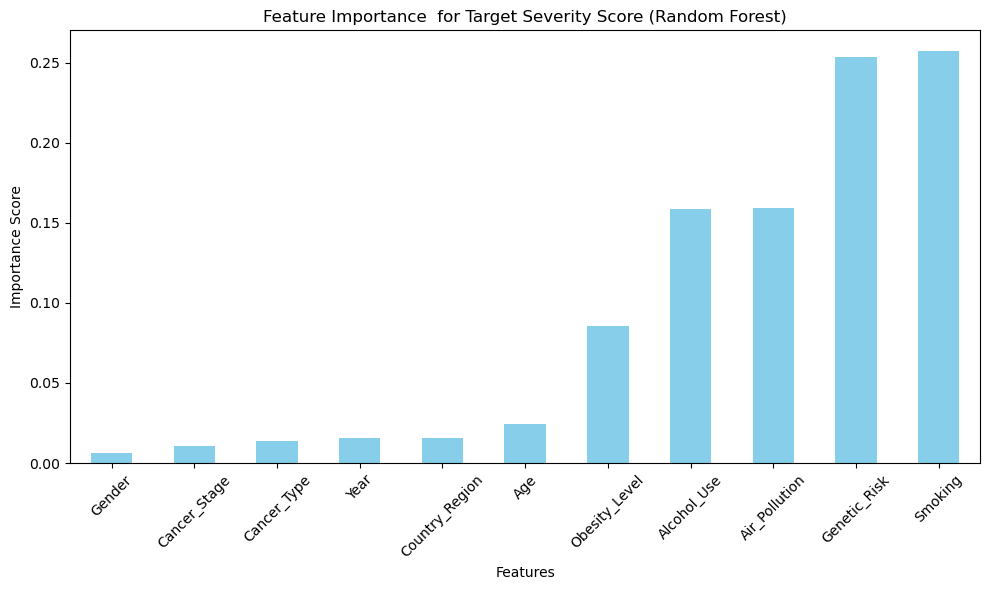

In [17]:
feature_importance_severity= pd.Series(model.feature_importances_, index=X.columns,).sort_values(ascending=True)

#plotting of important features
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color="skyblue")
plt.title("Feature Importance  for Target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

Feature	Importance	Interpretation
Smoking	0.2336	Most important predictor of severity score. The more a patient smokes, the higher their severity tends to be.
Genetic_Risk	0.2286	Strong genetic predisposition is nearly as important as smoking.
Treatment_Cost_USD	0.2133	Higher treatment costs are associated with more severe conditions.
Alcohol_Use	0.1291	Alcohol also plays a significant role.
Air_Pollution	0.1271	Environmental factor—patients in more polluted areas have worse severity scores.
Obesity_Level	0.0573	Has an effect, but much smaller.
Age to Gender	< 0.01	Very low importance; these don’t explain much variation in severity score.


E.g., Smoking, Genetic Risk, AIr plollution are major influencers. This tells you where interventions might reduce severity.


In [19]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Survival_Years"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# train the model
model= RandomForestRegressor(random_state=40)
GSC= GridSearchCV(model , param_grid, cv=3, scoring="r2", n_jobs=-1)
GSC.fit(X_train_s, y_train_s)

best_rf_severity= GSC.best_estimator_

# evalaute the model
train_r2_severity= r2_score(y_train_s , best_rf_severity.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , best_rf_severity.predict(X_test_s))


In [20]:
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.0003487352301705382


<Axes: xlabel='Survival_Years', ylabel='Count'>

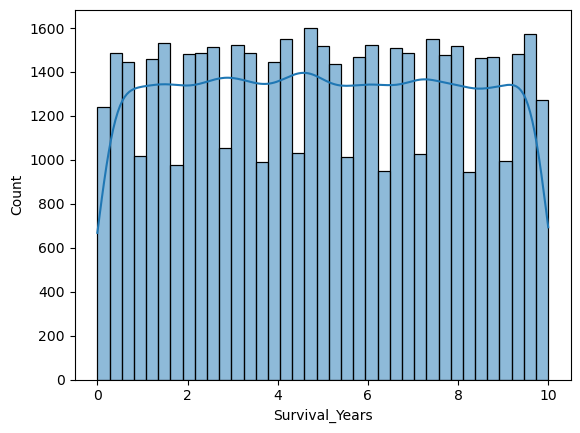

In [9]:
import seaborn as sns
sns.histplot(data["Survival_Years"], kde=True)

In [10]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

"The information in your columns does not help the model figure out how long someone will survive."

# Explore the economic burden of cancer treatment across demographics and countries

In [14]:
data = pd.read_csv("global_cancer_patients_2015_2024 (1).csv")
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [15]:
data["Age_Group"]=pd.cut(data["Age"],bins=[0,30,45,60,75,100],labels=["0-30","31-45","46-60","61-75","76+"])

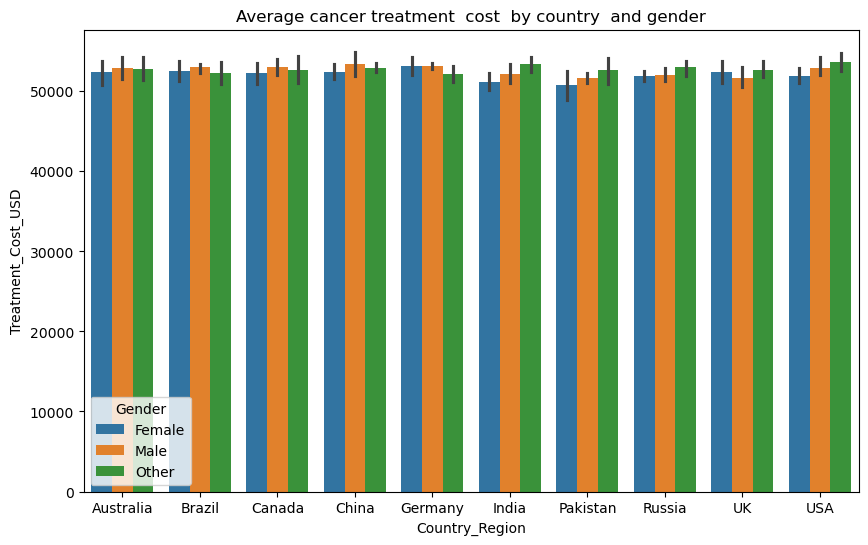

In [16]:
country_age_cost= data.groupby(["Country_Region", "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost,x="Country_Region", y="Treatment_Cost_USD", hue="Gender") 
plt.title("Average cancer treatment  cost  by country  and gender")
plt.show()

In [17]:
country_age_cost= data.groupby(["Country_Region", "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

In [18]:
heatmap_data= country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

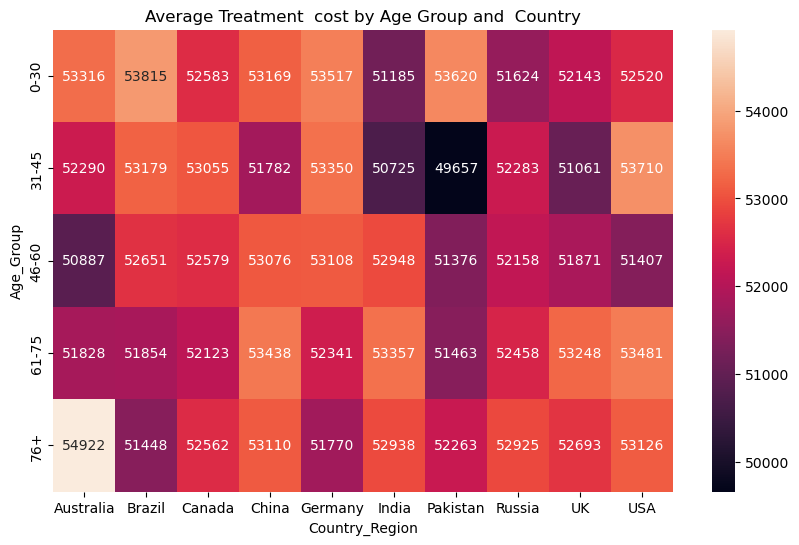

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment  cost by Age Group and  Country")
plt.show()

Geographic Disparities in Economic Burden
Cancer treatment costs are significantly higher in developed nations such as the USA, Australia, and China, revealing the heavy financial load in advanced healthcare systems. Meanwhile, countries like India and Pakistan exhibit comparatively lower costs, likely due to lower healthcare pricing structures or limited access to advanced treatment. This highlights a clear global inequality in healthcare affordability that can intensify financial strain depending on a patient’s country of residence.

Gender-Based Cost Patterns Are Uniform
Across all countries, gender-based differences in average treatment costs are minimal, suggesting no major gender bias in pricing or access to cancer care. This uniformity may reflect standardization in treatment protocols or equitable healthcare policies, but it also points to the fact that the financial impact of cancer is universal across genders.

Age-Related Escalation in Treatment Costs
Treatment costs tend to rise with age, particularly for those aged 61 and above. This trend is especially evident in countries like Australia and the USA, where older age groups face sharply higher costs. The increased financial burden in these groups could be due to more intensive care needs, multiple comorbidities, or prolonged treatments. This pattern underlines the vulnerability of elderly populations and the pressing need for targeted support for senior citizens.

Role of Healthcare Systems in Cost Variation
Countries with robust public healthcare systems—such as Canada, Germany, and the UK—show relatively stable treatment costs across age groups, reflecting the benefits of healthcare subsidies or coverage. This consistency reinforces the importance of government intervention and universal healthcare in mitigating financial disparities in cancer treatment.


# 

# Assess whether highest treatment cost is associated with longer survival

Null Hypothesis (H₀) :- There is no correlation between treatment cost and survival years.
Alternative Hypothesis (H₁):- There is a correlation (positive or negative) between treatment cost and survival years.

In [20]:
from scipy.stats  import pearsonr, spearmanr
x= data["Treatment_Cost_USD"]
y=data["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}")

# Spearman correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}")

alpha=0.05

def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  reject thr hull hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

Pearson Correlation Coefficient: -0.00042940542830214955
Pearson P-Value : 0.9235082012963326
spearman Correlation Coefficient: -0.0004454737292549569
spearman P-Value : 0.9206551702014918
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


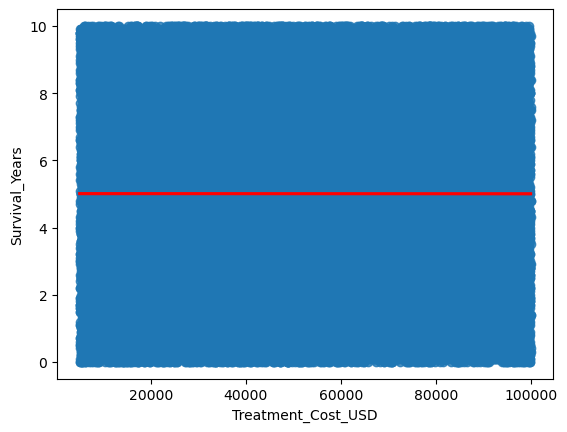

In [21]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

There is no relationship between Treatment cost and survival years.

# Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [22]:
df= data.copy()

In [23]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [24]:
grouped_stats= df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()

In [25]:
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


Treatment Cost vs. Cancer Stage
Null Hypothesis (H₀): The average treatment cost is the same across all cancer stages.
Alternative Hypothesis (H₁): At least one stage has a different average cost.
    
Survival Years vs. Cancer Stage
Null Hypothesis (H₀): The average survival years are the same across all cancer stages.
Alternative Hypothesis (H₁): At least one stage has a different survival duration.


In [26]:
grouped_costs=[]
grouped_survival=[]


for  stage in stage_order:
    stage_data= df[df["Cancer_Stage"]==stage]
    cost= stage_data["Treatment_Cost_USD"]
    survival= stage_data["Survival_Years"]
    grouped_costs.append(cost)
    grouped_survival.append(survival)
    

In [27]:
len(grouped_costs)

5

In [28]:
# check for normaility
from scipy.stats import  shapiro, f_oneway
normal_cost=0
normal_survival=0

for i in range (len(stage_order)):
    cost_p= shapiro(grouped_costs[i]).pvalue
    surv_p= shapiro(grouped_survival[i]).pvalue 
    print(f" cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}")
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1



 cost 1.5471821061637387e-47 for group 0
Survival 1.6291039522109283e-47 for group 0
 cost 7.306523956950957e-48 for group 1
Survival 7.575551046259697e-48 for group 1
 cost 8.943579643043388e-48 for group 2
Survival 4.041659465829829e-48 for group 2
 cost 5.267270033022367e-48 for group 3
Survival 1.3648520457944784e-47 for group 3
 cost 1.5838640189581322e-47 for group 4
Survival 2.2992598289836786e-47 for group 4


In [29]:
print(normal_cost)
print(normal_survival)

5
5


In [30]:
from scipy.stats import kruskal

In [31]:
kusrkal_cost =kruskal(*grouped_costs)
kurkal_survival= kruskal(*grouped_survival)

p_cost= kusrkal_cost.pvalue
p_survival= kurkal_survival.pvalue


In [32]:
p_cost

np.float64(0.4254451689062656)

In [33]:
p_survival

np.float64(0.6033078729984223)

=== Kruskal-Wallis Test: Treatment Cost across Cancer Stages ===

P-value: 0.4254
Conclusion: No significant difference in treatment costs among cancer stages.

=== Kruskal-Wallis Test: Survival Years across Cancer Stages ===

P-value: 0.6033
Conclusion: No significant difference in survival years among cancer stages.

# Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity 

Null Hypothesis (H₀):
The interaction effect between genetic risk and smoking on cancer Severity is not significant.
(Genetic risk does not amplify or alter the effect of smoking.)

Alternative Hypothesis (H₁):
The interaction effect between genetic risk and smoking on  cancer severity is significant.
(Genetic risk does amplify or alter the effect of smoking.)

In [34]:
import statsmodels.formula.api as smf

model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64

In [35]:
p_value=0.628255

Interpretation:
The interaction coefficient is negative but very small: -0.000228

The p-value = 0.628, which is greater than 0.05, so we fail to reject the null hypothesis

🧪 Conclusion (Statistical):
✅ Test Used: Multiple Linear Regression with interaction term

📌 Null Hypothesis (H₀): No interaction effect between genetic risk and smoking

📌 Alternative Hypothesis (H₁): There is an interaction effect

The interaction effect between Genetic Risk and Smoking on Target Severity Score is not statistically significant (p = 0.628 > 0.05).

This means that based on your data, there is no evidence that Genetic Risk amplifies or reduces the effect of Smoking on the Target Severity Score.

In other words, smoking and genetic risk may each have independent effects (or none), but they do not interact in a way that significantly changes the outcome.